<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PWM_SineTriangle_ThreePhaseVaryingFrequencyPhaseMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Carrier-Based Pulse Width Modulation for Three-Phase Systems: Varying Modulation Index, Frequency, and Phase Angle</h1></b>

Dr. Bingsen Wang

11/11/2024
</center>

#Python Code
The Python code illustrates the basic PWM.  

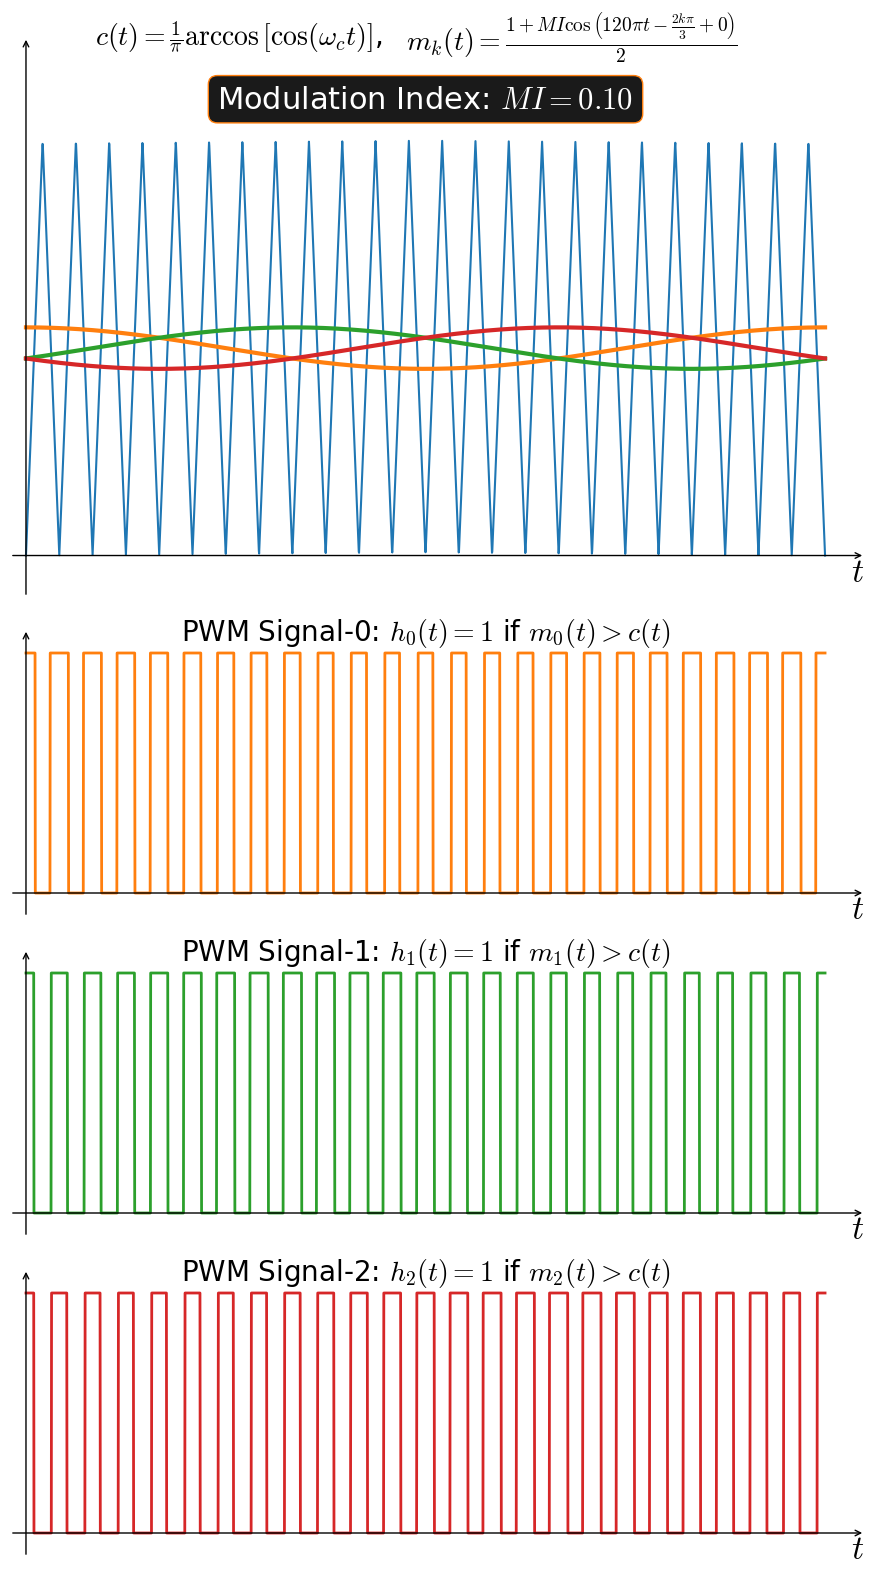

In [5]:
import matplotlib as mpl
from os import linesep
from numpy import linspace,cos,pi,sin,random,arccos,heaviside,array
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from matplotlib import animation,rc,cm
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})

def carr(f,t): #carrier
  return 1/pi*arccos(cos(2*pi*f*t))

def m(t,MI,f,theta): #modulation function
  return (MI*cos(2*pi*f*t + theta) + 1)/2

def h(ct,mt): #PWM switching function
  return heaviside(mt-ct,0)

#parameters
Nf = 250
fc = 24*60 # carrier frequency
Tm = 1/60 # signal period
MI_lst=linspace(.1,.9,Nf)
fm_lst=linspace(60,120,Nf)
theta_lst=linspace(0,2*pi,Nf)
t=linspace(0,Tm,3000)
ct = carr(fc,t) #carrier time-domain signal

clst = list(cm.tab10.colors) #colors of lines
fig = plt.figure(figsize=(9,16))
ax_frame = [[[.025,.6,.95,.35], [-.02*Tm,1.05*Tm], [-.1,1.25]], #sines & triangle
            [[.025,.4,.95,.18], [-.02*Tm,1.05*Tm], [-.1,1.1]], # pwm-0
            [[.025,.2,.95,.18], [-.02*Tm,1.05*Tm], [-.1,1.1]], # pwm-1
            [[.025,0, .95,.18], [-.02*Tm,1.05*Tm], [-.1,1.1]], # pwm-2
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lst,lines = [],[]
for k in range(len(ax_frame)):
  xnm,ynm = ax_frame[k][1:]
  ax=fig.add_axes(ax_frame[k][0],xlim=xnm, ylim=ynm,fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xnm[1], 0), (xnm[0], 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ynm[1]), (0,ynm[0]),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    lines.append(ax.plot([], [], c=clst[0], lw=1.5)[0])
    [lines.append(ax.plot([], [], c=clst[k+1], lw=3)[0]) for k in range(3)]
  else:
    lines.append(ax.plot([], [], c=clst[k], lw=2)[0])
  ax.text(xnm[1],0,' $t$',size=24,va='top',ha='right') #x-axis label

lines[0].set_data(t,ct)
ax_lst[0].text(0.45*Tm,1.25,r'$c(t)=\frac{1}{\pi}\arccos\left[\cos(\omega_c t)\right]$, ',
               va='center',ha='right',size=20)
[ax_lst[k+1].text(0.5*Tm,1.15,rf'PWM Signal-{k}: $h_{k}(t)=1$ if $m_{k}(t)>c(t)$',
                  va='top',ha='center',size=20) for k in range(3)]
txt_title=ax_lst[0].text(0.475*Tm,1.25,r'',va='center',ha='left',size=20)
txt_var=ax_lst[0].text(.5*Tm,1.1,'',size=22,ha='center',va='center',color='1',
                    bbox=dict(boxstyle="round,pad=0.3", fc=".1", ec=clst[1], lw=1))

# animation function. This is called sequentially
def animate(ii):
  theta = 0 #phase angle
  fm = 60 # signal fundamental
  MI = 0.8 # modulation index
  i,k=ii%Nf,ii//Nf
  if k==0:
    MI=MI_lst[i]
    txt_var.set_text(rf'Modulation Index: $MI={MI:.2f}$')
    if i==0:
      txt_title.set_text(r'$m_k(t)=\frac{1+MI\cos\left(120\pi t-\frac{2k\pi}{3} +0\right)}{2}$')
  elif k==1:
    fm=fm_lst[i]
    txt_var.set_text(f'Fundamental Frequency: $f_m={fm:.2f}\ Hz$')
    if i==0:
      txt_title.set_text(r'$m_k(t)=\frac{1+0.8\cos\left(2\pi f_m t-\frac{2k\pi}{3} +0\right)}{2}$')
  else:
    theta=theta_lst[i]
    txt_var.set_text(rf'Phase Angle: $\theta={theta*180/pi:.2f}^\circ$')
    if i==0:
      txt_title.set_text(r'$m_k(t)=\frac{1+0.8\cos\left(120\pi  t-\frac{2k\pi}{3} +\theta\right)}{2}$')
  mt = [m(t,MI,fm,-k*2*pi/3+theta) for k in range(3)] #modulation function time series
  ht = [h(ct,mt[k]) for k in range(3)] #pwm signal time series

  [lines[k+1].set_data(t,mt[k]) for k in range(3)]
  [lines[k+4].set_data(t,ht[k]) for k in range(3)]
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf*3, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"PWM_sineTriangle_ThreePhaseVaryingFmThetaMI.mp4"
writervideo = animation.FFMpegWriter(fps=40)
anim.save(fn, writer=writervideo,dpi = 200)